# Density plots

This example script takes you through visualising density data using a checkerboard or heatmap, and using a contour plot. It will show you how to do this using the simplified equation of state and then you will use the full equation of state to make similar plots.

## Importing libraries

First we need to import the libraries needed for this script. We will use `numpy` for numerical operations, and `matplotlib.pyplot` for plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Defining the input data

First we set the range  of temperature (between 0°C and 30°C with increments of 0.5°C) and salinity (between 20 g/kg and 40 g/kg with increments of 0.5 g/kg) that we're exploring, and the pressure (surface pressure, 0 dbar).

In [5]:
T_range = np.arange(0, 30.5, .5)
S_range = np.arange(20, 40.5, .5)
P = 0

## Calculate density using the simplified equation of state

First we need to define the constants in the equation of state:

In [6]:
alpha = -0.15 # kg/m^3 per degree celcius
beta = 0.78 # kg/m^3 per ppt salinity
gamma = 4.5e-3 # kg/m^3 per decibar (notice how we express 10^-3 as e-3)

and the reference values:

In [7]:
rho0 = 1027
T0 = 10
S0 = 35
P0 = 0

## Calculate the density at every combination of temperature and salinity

Above we created vectors of temperature (T) and salinity (S). We can calculate the density at every combination of these parameters easily in python. Think about how you might do this in excel...

First we need to convert our range of tempratures and salinities into a grid, using `np.meshgrid()`. Type `help(np.meshgrid)` in a code cell to learn how this works.

In [8]:
S, T = np.meshgrid(S_range, T_range)

Now we write out the equation of state, using the constants above, and the variables T and S, which now represent vertices on a grid. We'll call the density `density_simple` to distinguish it from the `real` density.

In [10]:
density_simple = rho0 + (alpha*(T-T0) + beta*(S-S0) + gamma*(P-P0))

We can also calculate the density of a single type of water, for example with temperature = 10°C and salinity = 35 g/kg and pressure = 0 dbar:

In [14]:
density_value = rho0 + (alpha*(10-T0) + beta*(35-S0) + gamma*(0-P0))
density_value

1027.0

## Make a pcolor plot

`plt.pcolor` gives us a heatmap, or "checkerboard" plot of a matrix. We'll use it to plot density as a function of temperature and salinity, calculated using the simplified equation of state. Type `help(plt.pcolor)` to learn more.

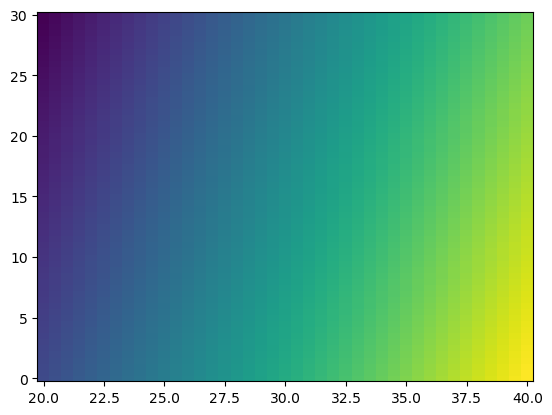

In [16]:
plt.pcolor(S, T, density_simple); #this puts salinity on the x axis and temperature on the y axis

Let's add some labels to the axis! In python, you can type in symbols, greek letters, etc using latex syntax. For example, to get the greek letter $\alpha$ you need to type `$\\alpha$`, using the `$` signs to enter "math mode". We can type in the degree symbol ($^{\circ}$) by typing `$^{\\circ}$`:

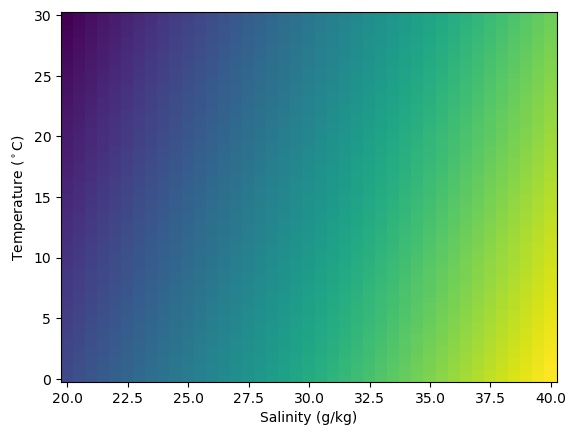

In [47]:
plt.pcolor(S, T, density_simple);
plt.xlabel('Salinity (g/kg)');
plt.ylabel('Temperature (${^\\circ}$C)');

We should also add a colorbar to match colour to density value, and the appropriate label for the colorbar too. While we are at it, let's also add a title.

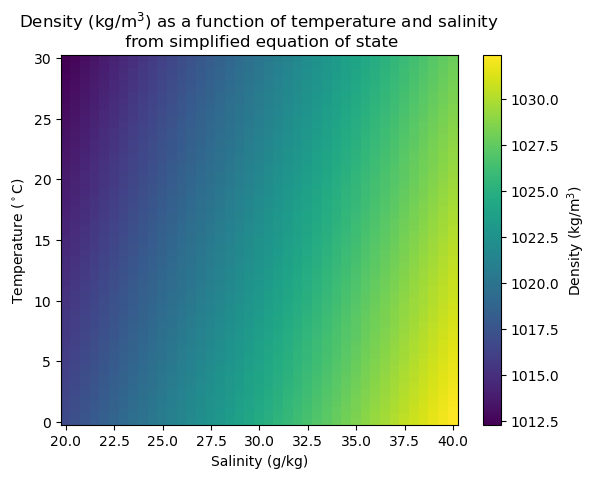

In [46]:
plt.pcolor(S, T, density_simple);
plt.xlabel('Salinity (g/kg)');
plt.ylabel('Temperature (${^\\circ}$C)');
cbar = plt.colorbar();
cbar.set_label('Density (kg/m$^3$)');
# The \n makes a line break because the title is longer than our figure!
plt.title('Density (kg/m$^3$) as a function of temperature and salinity \n from simplified equation of state'); 

We can try a different color scheme, passing a different colormap as an argument for our `plt.pcolor` function (the above figure uses the default colormap from matplotlib). You can browse existing `matplotlib` colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html), but even better, we can load a library with ocean-specific, **colorblind friendly** colormaps called [`cmocean`](https://matplotlib.org/cmocean/): 

In [27]:
import cmocean.cm as cm

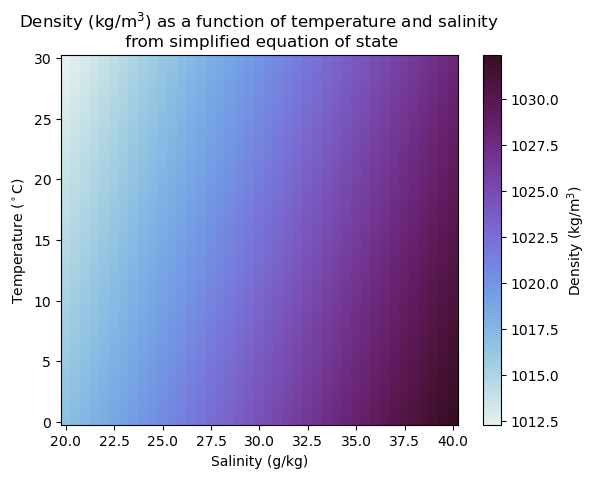

In [45]:
plt.pcolor(S, T, density_simple, cmap = cm.dense);
plt.xlabel('Salinity (g/kg)');
plt.ylabel('Temperature (${^\\circ}$C)');
cbar = plt.colorbar();
cbar.set_label('Density (kg/m$^3$)');
plt.title('Density (kg/m$^3$) as a function of temperature and salinity \n from simplified equation of state'); 

We can also visualise the same data using a filled contour plot instead of the checkerboard. It's all the same except we use `plt.contourf` instead of `plt.pcolor`:

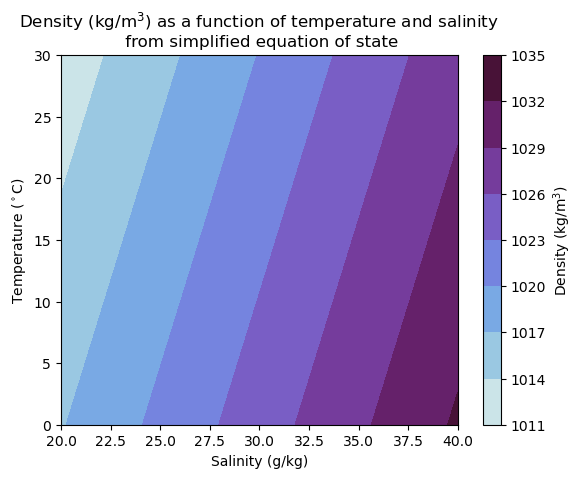

In [44]:
plt.contourf(S, T, density_simple, cmap = cm.dense);
plt.xlabel('Salinity (g/kg)');
plt.ylabel('Temperature (${^\\circ}$C)');
cbar = plt.colorbar();
cbar.set_label('Density (kg/m$^3$)');
plt.title('Density (kg/m$^3$) as a function of temperature and salinity \n from simplified equation of state'); 

Here's a little challenge: See if you can plot a symbol at the location where Temperature = 5°C and Salinity = 30 g/kg on the graph. Use `plt.scatter()`

## Now it's your turn! 

Make the same plot of density as a function of temperature and salinity, but using the full equation of state. To do this, you will use a library called `gsw` (Gibbs Sea Water). This library contains **many** functions to calculate conversions between types of salinity or temperature variables (for example from in-situ temperature to potential temperature), calculate density from temperature and salinity and many more. You can read the documentation [here](https://teos-10.github.io/GSW-Python/). Let's import the library:

In [32]:
import gsw

The function that we will use is `gsw.rho()`. This function takes as input absolute salinity, conservative temperature and pressure:

In [34]:
help(gsw.rho)

Help on function rho in module gsw._wrapped_ufuncs:

rho(SA, CT, p)
    Calculates in-situ density from Absolute Salinity and Conservative
    Temperature, using the computationally-efficient expression for
    specific volume in terms of SA, CT and p  (Roquet et al., 2015).

    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    CT : array-like
        Conservative Temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar

    Returns
    -------
    rho : array-like, kg/m
        in-situ density


    Notes
    -----
    Note that potential density with respect to reference pressure, pr, is
    obtained by calling this function with the pressure argument being pr
    (i.e. "gsw_rho(SA,CT,pr)").

    Note that this 75-term equation has been fitted in a restricted range of
    parameter space, and is most accurate inside the "oceanographic funnel"
    described in McDougall et al. (2003).  The GSW

Start by checking that you have everything in the right place by using the density function to calculate the denisty of seawater with a temperature of 10°C, salinity of 35 g/kg, and pressure of 0 dbar:

In [ ]:
rho = gsw.rho(35,10,0)


if this returns a value of 1026.82, you're on track. Otherwise ask for help before proceeding.

Notice that this function returns density in units of kg/m3. 

The next step is to copy what was done above, to generate a similar "checkerboard" plot of density as a function of temperature and salinity, and a similar contour plot, but now using the density calculated using the full equation. Call your new density `density_gsw`:

In [ ]:
# Calculate density_gsw here

In [38]:
density_gsw = gsw.rho(S, T, 0)

We'll make a new figure with two panels, so you can compare the two. Making two panels is a somewhat more involved procedure: we need to create a figure and two axis within the figure. This can be done using the following line:

```
fig, axs = plt.subplots(number_of_rows, number_of_columns, figsize = (width, height))
```

`axs` will contain a list of the axis we have defined depending on `number_of_columns` and `number_of_rows`. You can select a specific axis from the list using `[n]`, and then plot onto the axis. Notice how the syntax for axis labels and titles is a bit different from before.

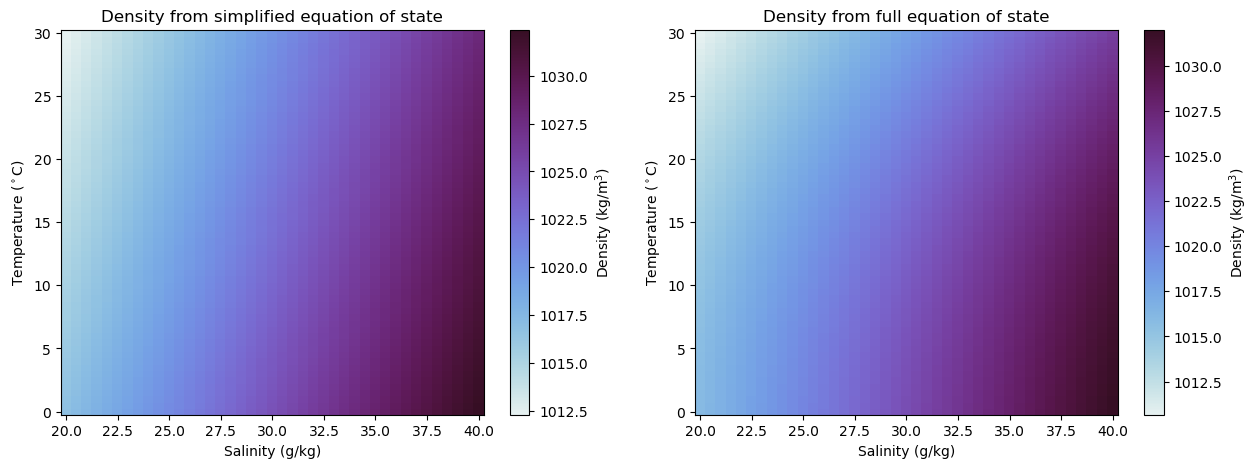

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

# Simple density on the first axis
CS = axs[0].pcolor(S, T, density_simple, cmap = cm.dense);
cbar = plt.colorbar(CS);
cbar.set_label('Density (kg/m$^3$)');
axs[0].set_xlabel('Salinity (g/kg)');
axs[0].set_ylabel('Temperature (${^\\circ}$C)');
axs[0].set_title('Density from simplified equation of state'); 

# Density from GSW on the second axis
CS = axs[1].pcolor(S, T, density_gsw, cmap = cm.dense);
cbar = plt.colorbar(CS);
cbar.set_label('Density (kg/m$^3$)');
axs[1].set_xlabel('Salinity (g/kg)');
axs[1].set_ylabel('Temperature (${^\\circ}$C)');
axs[1].set_title('Density from full equation of state'); 

This is great, but it is hard to visualize the differences. We can add a third panel with the calculated difference between the two. Note how for the difference plot we use a different colormap `RdBu` (red to blues) from `matplotlib` but reversed (`RdBu_r`) so that it goes from blues to reds.

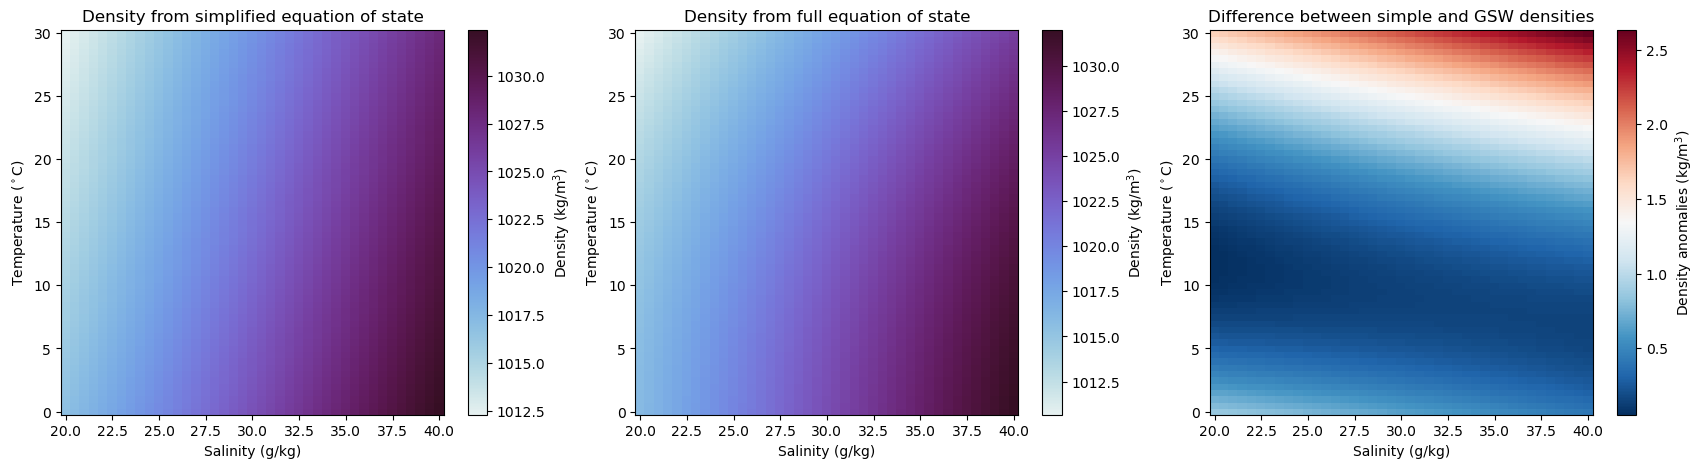

In [49]:
fig, axs = plt.subplots(1, 3, figsize = (21, 5))

# Simple density on the first axis
CS = axs[0].pcolor(S, T, density_simple, cmap = cm.dense);
cbar = plt.colorbar(CS);
cbar.set_label('Density (kg/m$^3$)');
axs[0].set_xlabel('Salinity (g/kg)');
axs[0].set_ylabel('Temperature (${^\\circ}$C)');
axs[0].set_title('Density from simplified equation of state'); 

# Density from GSW on the second axis
CS = axs[1].pcolor(S, T, density_gsw, cmap = cm.dense);
cbar = plt.colorbar(CS);
cbar.set_label('Density (kg/m$^3$)');
axs[1].set_xlabel('Salinity (g/kg)');
axs[1].set_ylabel('Temperature (${^\\circ}$C)');
axs[1].set_title('Density from full equation of state'); 

# Density difference
CS = axs[2].pcolor(S, T, density_simple - density_gsw, cmap = 'RdBu_r');
cbar = plt.colorbar(CS);
cbar.set_label('Density anomalies (kg/m$^3$)');
axs[2].set_xlabel('Salinity (g/kg)');
axs[2].set_ylabel('Temperature (${^\\circ}$C)');
axs[2].set_title('Difference between simple and GSW densities'); 

After you've calculated the density, make the same plots but with `plt.contourf`.